### Question 2

#### (a)
Differentiate both sides w.r.t. $\alpha$ we have,
$$ SC_S + KC_K = C(S, K) $$
Differentiate both sides w.r.t $S$ and $K$ respectively, we have
$$ C_S + \alpha SC_{SS} + \alpha K C_{KS} = C_S $$
$$ \alpha SC_{SK} + C_K + \alpha K C_{KK} = C_K $$
Hence we have
$$ \Gamma = C_{SS} = -\frac{K}{S}C_{KS} = \frac{K^2}{S^2} C_{KK} $$

#### (b)
Under the absence of butterfly arbitrage, we know that the option price must be convex in strike K, hence $C_{KK}\leq 0$, there must be $\Gamma \geq 0$.

#### (c)

If an option has negative $\Gamma$, it implies a convexity arbitrage opportunity.

To exploit this:
- Since the option has negative Gamma, from the formula that $C_{KK}\leq 0$, meaning that the option is concave in strike.
- We can do a convexity arbitrage: Buy an option with a strike price slightly below the current price, sell two options at the current price, and buy an option with a strike price slightly above the current price. This position gives us non-negative initial cash flow, and the payoff has positive probability that in the future we will have a positive payoff. Hence this constructs a butterfly arbitrage.

### Question 3

#### (a) 

Log-normal SDE for dividend paying stock $S$
$$
\begin{align*}
dS_t = (\mu - q)S_tdt + \sigma S_tdW_t
\end{align*}
$$
Use Ito's Lemma to derive SDE for $F_{t}^{T}$
$$
\begin{align*}
dF_{t}^{T} &= d(S_{t}e^{-q(T-t)}) = e^{-q(T-t)}dS_{t} + S_{t}de^{-q(T-t)} + dS_{t}de^{-q(T-t)}\\
&= e^{-q(T-t)}((\mu - q)S_tdt + \sigma S_tdW_t) + qe^{-q(T-t)}S_{t}dt\\
&= e^{-q(T-t)}S_{t}(\mu dt + \sigma dW_t)\\
&= \mu F_{t}^{T}dt + \sigma F_{t}^{T}dW_{t}
\end{align*}
$$

#### (b)

From
$$
\begin{align*}
F_{t}^{T} &= S_{t}e^{-q(T-t)}\\
C(S_{t}, t) &= V(F_{t}^{T}, t)
\end{align*}
$$
We can obtain
$$
\begin{align*}
\frac{\partial V}{\partial t} &= \frac{\partial C}{\partial S}\frac{\partial S}{\partial t} + \frac{\partial C}{\partial t} = -qSC_S + C_t\\
\frac{\partial V}{\partial F} &= \frac{\partial C}{\partial S}\frac{\partial S}{\partial F} + \frac{\partial C}{\partial t}\frac{\partial t}{\partial F} = e^{q(T-t)}C_S\\
\frac{\partial^2 V}{\partial F^2} &= \frac{\partial V_F}{\partial S}\frac{\partial S}{\partial F} + \frac{\partial V_F}{\partial t}\frac{\partial t}{\partial F} = e^{2q(T-t)}C_{SS}
\end{align*}
$$
Replace $V$ and $F$ with $C$ and $S$, we obtain the BS PDE for a dividend paying asset
$$
\begin{align*}
-qSC_S + C_t +\frac{1}{2}\sigma^2S^2C_{SS} + rSC_{S} - rC &= 0\\
C_t + (r-q)SC_{S} + \frac{1}{2}\sigma^2S^2C_{SS} - rC &= 0
\end{align*}
$$


### Question 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

def delta_call(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.cdf(d1)

def delta_put(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return -np.exp(-q * T) * norm.cdf(-d1)

def gamma(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))


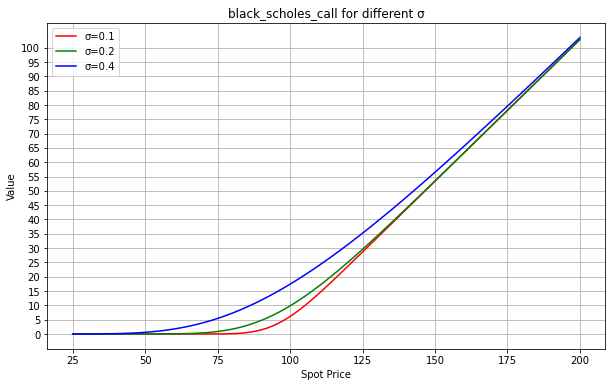

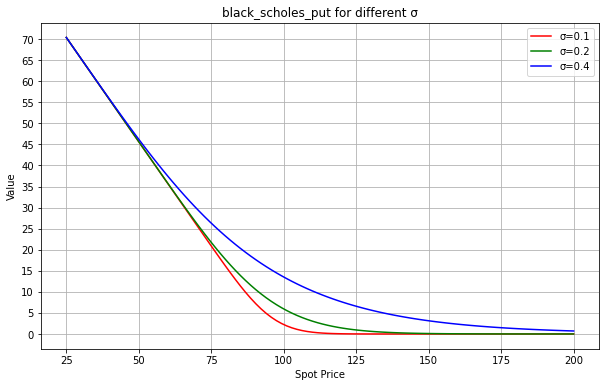

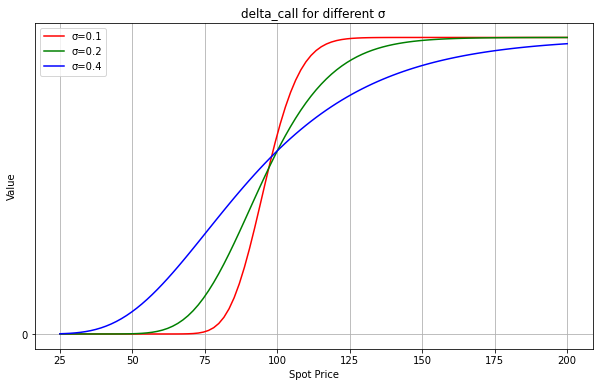

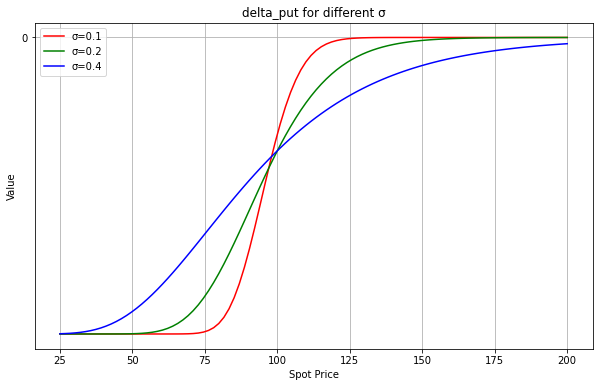

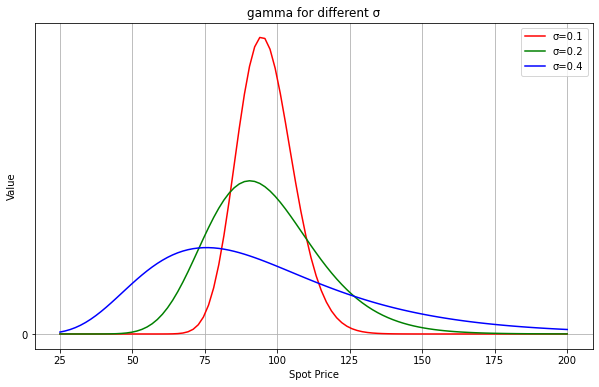

In [3]:
def plot_option_greeks(S_range, K, T, r, q, params, param_label, option_function):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(10, 6))
    for i, param in enumerate(params):
        values = [option_function(S, K, T, r, q, param) for S in S_range]
        plt.plot(S_range, values, color=colors[i], label=f'{param_label}={param}')
    plt.xlabel('Spot Price')
    plt.ylabel('Value')
    plt.title(f'{option_function.__name__} for different {param_label}')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(S_range), max(S_range)+1, 25))
    plt.yticks(np.arange(0, max(values)+1, 5))
    plt.show()

S_range = np.linspace(25, 200, 100)
K = 100
T = 1
r = 0.05
q = 0.01

# Change the parameters and option_function as needed
plot_option_greeks(S_range, K, T, r, q, params=[0.1, 0.2, 0.4], param_label='σ', option_function=black_scholes_call)
plot_option_greeks(S_range, K, T, r, q, params=[0.1, 0.2, 0.4], param_label='σ', option_function=black_scholes_put)
plot_option_greeks(S_range, K, T, r, q, params=[0.1, 0.2, 0.4], param_label='σ', option_function=delta_call)
plot_option_greeks(S_range, K, T, r, q, params=[0.1, 0.2, 0.4], param_label='σ', option_function=delta_put)
plot_option_greeks(S_range, K, T, r, q, params=[0.1, 0.2, 0.4], param_label='σ', option_function=gamma)


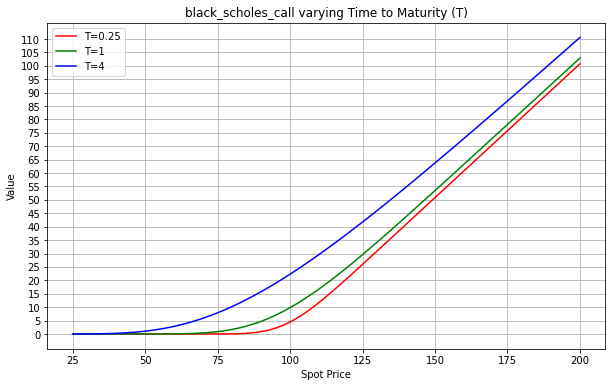

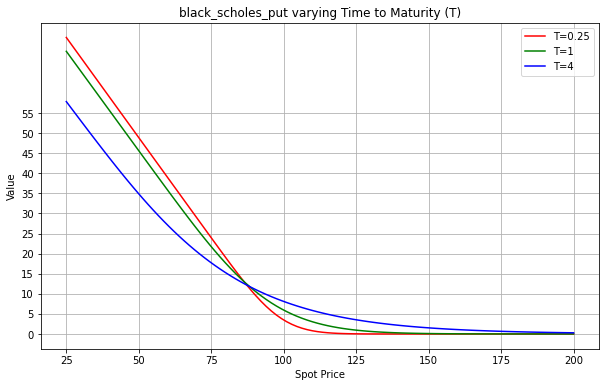

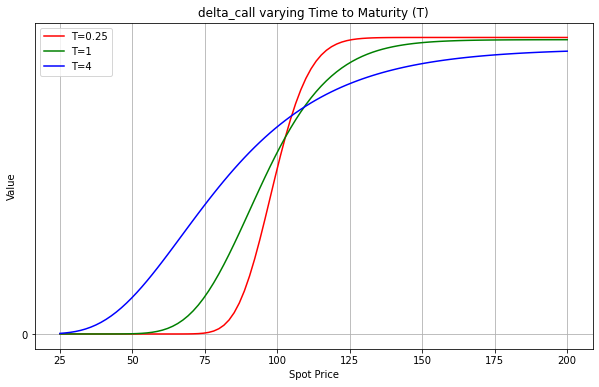

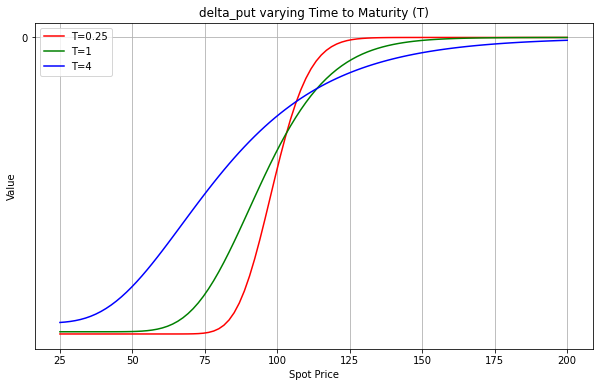

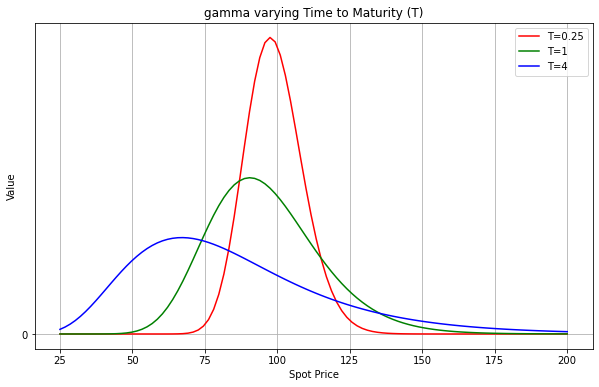

In [4]:
def plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts, option_function):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(10, 6))
    
    for i, T in enumerate(Ts):
        values = [option_function(S, K, T, r, q, sigma) for S in S_range]
        plt.plot(S_range, values, color=colors[i], label=f'T={T}')
        
    plt.xlabel('Spot Price')
    plt.ylabel('Value')
    plt.title(f'{option_function.__name__} varying Time to Maturity (T)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(S_range), max(S_range)+1, 25))
    plt.yticks(np.arange(0, max(values)+1, 5))
    plt.show()

# Define your S_range, K, r, q, and sigma
S_range = np.linspace(25, 200, 100)
K = 100
r = 0.05
q = 0.01
sigma = 0.20  # Fixed volatility

# Call the function with the desired option_function and Ts
plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts=[0.25, 1, 4], option_function=black_scholes_call)
plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts=[0.25, 1, 4], option_function=black_scholes_put)
plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts=[0.25, 1, 4], option_function=delta_call)
plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts=[0.25, 1, 4], option_function=delta_put)
plot_option_greeks_varying_T(S_range, K, r, q, sigma, Ts=[0.25, 1, 4], option_function=gamma)